## Human Chat LLM

In [1]:
#import all necessary libraries
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import Word
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)

from warnings import filterwarnings
# Suppress warnings
filterwarnings('ignore')

# Pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)



In [2]:
# Read the file as plain text
with open("human_chat.txt", 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Create DataFrame with a single column 'Text' containing all the lines
df = pd.DataFrame(lines, columns=["Text"])

# Display the first few rows
print(df.head())


                                                Text
0                                     Human 1: Hi!\n
1          Human 2: What is your favorite holiday?\n
2  Human 1: one where I get to meet lots of diffe...
3  Human 2: What was the most number of people yo...
4         Human 1: Hard to keep a count. Maybe 25.\n


## Data Wrangling/Cleaning

In [3]:
print(df.shape)

(1495, 1)


In [4]:
df.dtypes

Text    object
dtype: object

In [5]:
print(len(df["Text"].unique()))

1382


In [6]:
# Normalizing Case Folding
df['Text'] = df['Text'].str.lower()

# Remove Punctuation
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True)

# Remove Numbers
df['Text'] = df['Text'].str.replace(r'\d', '', regex=True)

# Remove rows with empty or whitespace-only text
df['Text'] = df['Text'].str.strip()  # Remove leading/trailing spaces
df = df[df['Text'].str.len() > 0]  # Drop rows where 'Text' is empty

In [7]:
from nltk.corpus import stopwords
# Stopwords Removal
sw = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join([word for word in str(x).split() if word.lower() not in sw]))


In [8]:
# Use regex to split on non-word characters
df["Text"] = df["Text"].apply(lambda x: re.findall(r'\w+', x))

# Print the result
print(df.head())


                                               Text
0                                       [human, hi]
1                        [human, favorite, holiday]
2  [human, one, get, meet, lots, different, people]
3       [human, number, people, ever, met, holiday]
4                 [human, hard, keep, count, maybe]


In [9]:
from textblob import Word
# Lemmatization - reducing words into their roots
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))

df['Text'].head(10)

0                                      ['human', 'hi']
1                     ['human', 'favorite', 'holiday']
2    ['human', 'one', 'get', 'meet', 'lots', 'diffe...
3    ['human', 'number', 'people', 'ever', 'met', '...
4          ['human', 'hard', 'keep', 'count', 'maybe']
5                                 ['human', 'holiday']
6                      ['human', 'think', 'australia']
7          ['human', 'still', 'talk', 'people', 'met']
8    ['human', 'really', 'interactions', 'usually',...
9    ['human', 'yea', 'feel', 'like', 'god', 'often...
Name: Text, dtype: object

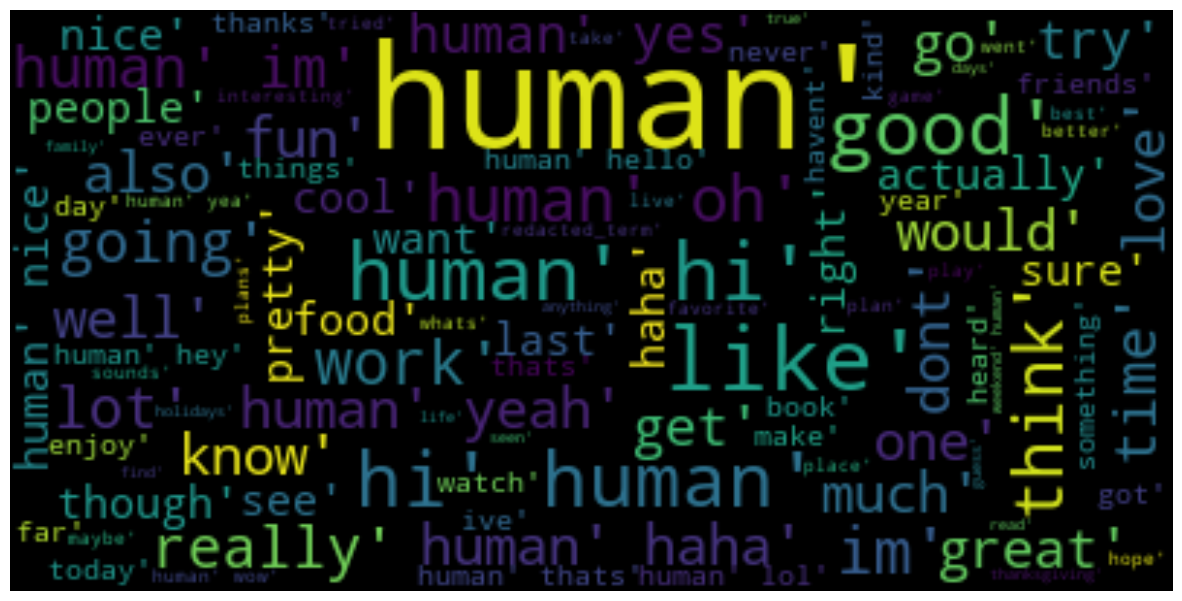

In [ ]:
# Wordcloud
text = " ".join(i for i in df.Text)
wordcloud = WordCloud(max_font_size=50, max_words=100).generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [11]:
# Calculating the word counts
word_count = df["Text"].apply(pd.Series).stack().value_counts().reset_index()
word_count.columns = ["words", "Count"]

# Print the first few rows
print(word_count.head())

                               words  Count
0                    ['human', 'hi']    104
1                 ['human', 'hello']     16
2                   ['human', 'hey']     13
3                          ['human']     13
4  ['human', 'hows', 'day', 'going']      6


In [12]:
word_count.shape

(1319, 2)

In [13]:
word_count["words"].nunique()

1319

In [14]:
word_count["Count"].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

count   1319.00
mean       1.13
std        2.91
min        1.00
5%         1.00
10%        1.00
25%        1.00
50%        1.00
75%        1.00
80%        1.00
90%        1.00
95%        1.00
99%        2.00
max      104.00
Name: Count, dtype: float64

In [15]:
# Capitalize Text (after processing)
df['Text'] = df['Text'].apply(lambda x: x.upper())
df['Text'].head(10)

0                                      ['HUMAN', 'HI']
1                     ['HUMAN', 'FAVORITE', 'HOLIDAY']
2    ['HUMAN', 'ONE', 'GET', 'MEET', 'LOTS', 'DIFFE...
3    ['HUMAN', 'NUMBER', 'PEOPLE', 'EVER', 'MET', '...
4          ['HUMAN', 'HARD', 'KEEP', 'COUNT', 'MAYBE']
5                                 ['HUMAN', 'HOLIDAY']
6                      ['HUMAN', 'THINK', 'AUSTRALIA']
7          ['HUMAN', 'STILL', 'TALK', 'PEOPLE', 'MET']
8    ['HUMAN', 'REALLY', 'INTERACTIONS', 'USUALLY',...
9    ['HUMAN', 'YEA', 'FEEL', 'LIKE', 'GOD', 'OFTEN...
Name: Text, dtype: object

In [16]:
# Character Count
df['char_count'] = df['Text'].str.len()

# Average Word Length Function
def avg_word(sentence):
    words = sentence.split()
    if len(words) == 0:
        return 0  # Handle the case where there are no words
    return sum(len(word) for word in words) / len(words)

# Apply the avg_word function
df['avg_word'] = df['Text'].apply(lambda x: avg_word(x)).round(1)

# Combine the columns into one table and display the result
result = df[['Text', 'char_count', 'avg_word']]

# Display the first few rows of the table
print(result.head())


                                                Text  char_count  avg_word
0                                    ['HUMAN', 'HI']          15      7.00
1                   ['HUMAN', 'FAVORITE', 'HOLIDAY']          32     10.00
2  ['HUMAN', 'ONE', 'GET', 'MEET', 'LOTS', 'DIFFE...          62      8.00
3  ['HUMAN', 'NUMBER', 'PEOPLE', 'EVER', 'MET', '...          55      8.30
4        ['HUMAN', 'HARD', 'KEEP', 'COUNT', 'MAYBE']          43      7.80


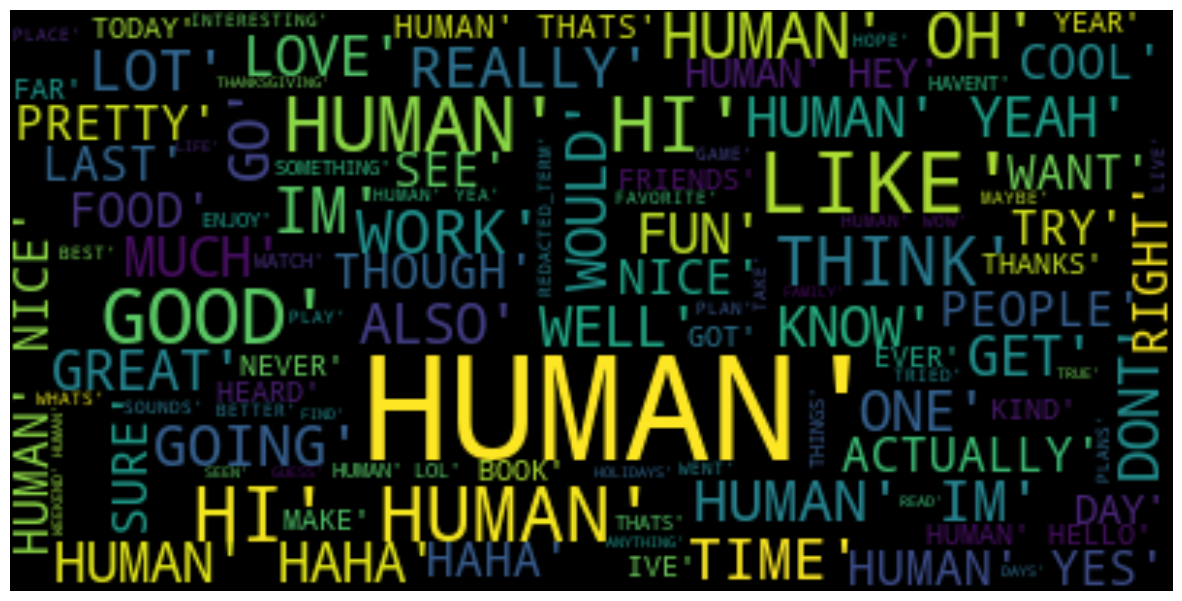

In [17]:
# Wordcloud
text = " ".join(i for i in df.Text)
wordcloud = WordCloud(max_font_size=50, max_words=100).generate(text)
plt.figure( figsize=(15,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()